# **CS 773: Data Mining and Security**

## **Course project**

## **Due: August 1, 2024**

## **Airline Passenger Satisfaction Survey**

To present the final excutive summary to leardship to take the better decicions on airline passenger satisfaction using data scinene, data minining and machine learning technquies.The idea is to make some useful conclusions that could help airline executives improve passenger satisfaction. The project aims to identify crucial factors that influence passenger satisfaction.

# **Presenter: Ashish Verma**

# **Dataset Details**

**Attribute Information:**
* Gender: Gender of the passengers (Female, Male)

* Customer Type: The customer type (Loyal customer, disloyal customer)

* Age: The actual age of the passengers

* Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

* Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

* Flight distance: The flight distance of this journey

* Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

* Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

* Ease of Online booking: Satisfaction level of online booking

* Gate location: Satisfaction level of Gate location

* Food and drink: Satisfaction level of Food and drink

* Online boarding: Satisfaction level of online boarding

* Seat comfort: Satisfaction level of Seat comfort

* Inflight entertainment: Satisfaction level of inflight entertainment

* On-board service: Satisfaction level of On-board service

* Leg room service: Satisfaction level of Leg room service

* Baggage handling: Satisfaction level of baggage handling

* Check-in service: Satisfaction level of Check-in service

* Inflight service: Satisfaction level of inflight service

* Cleanliness: Satisfaction level of Cleanliness

* Departure Delay in Minutes: Minutes delayed when departure

* Arrival Delay in Minutes: Minutes delayed when Arrival

**Label:**
* Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

Dataset link :

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction


# **Configure Collab to Get Kaggle Datasets**

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import statsmodels.api as sm
import scipy.stats as stats

from sklearn.decomposition import PCA
from mlxtend.frequent_patterns import fpgrowth, association_rules
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


# set style of visualization
sns.set_style("whitegrid")
sns.set_palette("Set2")

import warnings
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score



Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download teejmahal20/airline-passenger-satisfaction

Dataset URL: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction
License(s): other
  0% 0.00/2.71M [00:00<?, ?B/s]
100% 2.71M/2.71M [00:00<00:00, 32.6MB/s]


In [ ]:
! unzip -o  /content/airline-passenger-satisfaction.zip

Archive:  /content/airline-passenger-satisfaction.zip
  inflating: test.csv                
  inflating: train.csv               


### **Load data**

In [ ]:
# Load the CSV file
file_path = '/content/train.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the data structure
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.00000,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.00000,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.00000,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.00000,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.00000,satisfied


In [ ]:
data.drop(columns=['Unnamed: 0','id'],inplace=True)

# **Exploratory Data Analysis**

### **Univariate Analysis**

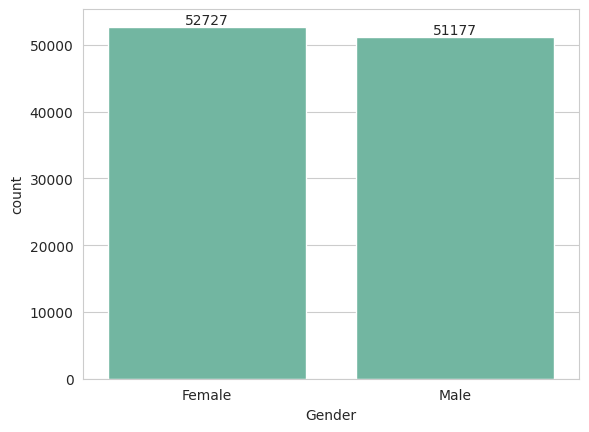

In [ ]:
def count_plot(column_name):
    graph = sns.countplot(x = column_name, data = data, order = data[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)

    plt.show()

count_plot("Gender")

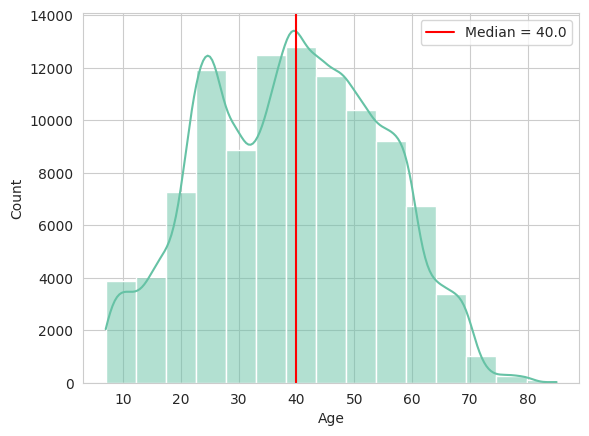

In [ ]:
sns.histplot(x = "Age", data = data, kde = True, bins = 15)
plt.axvline(data.Age.median(), label = f'Median = {data.Age.median()}', color = 'r')
plt.legend()
plt.show()

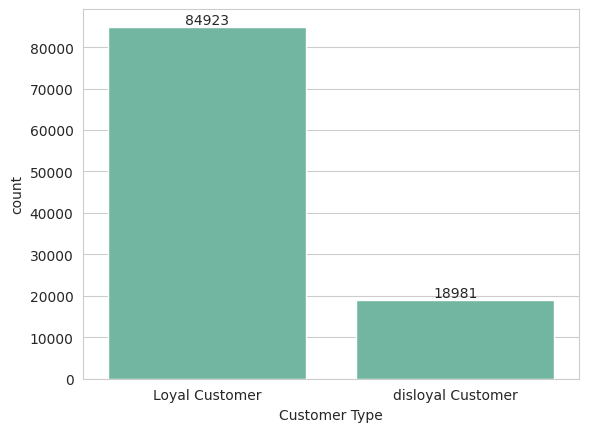

In [ ]:
count_plot("Customer Type")

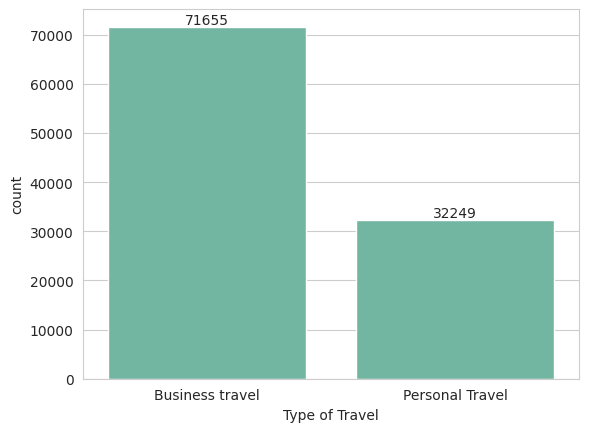

In [ ]:
count_plot("Type of Travel")

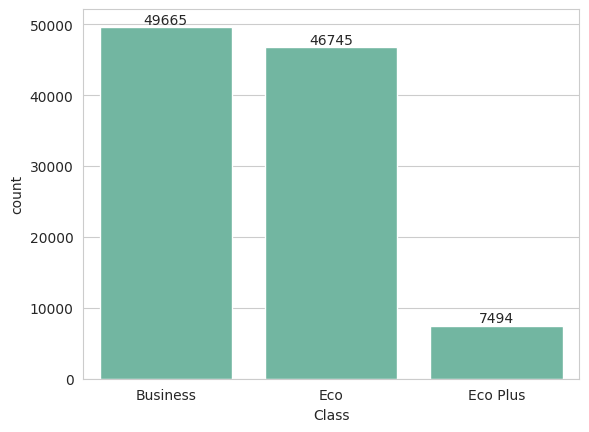

In [ ]:
count_plot("Class")

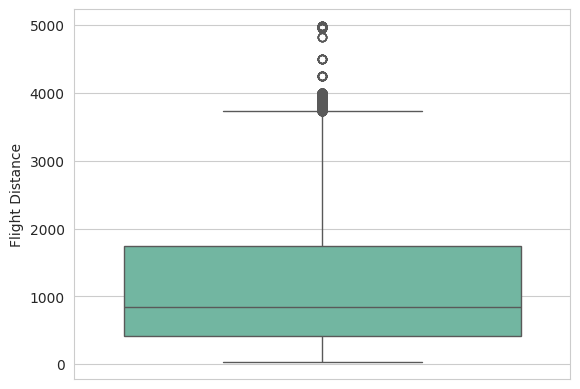

In [ ]:
sns.boxplot(y = "Flight Distance", data = data)
plt.show()

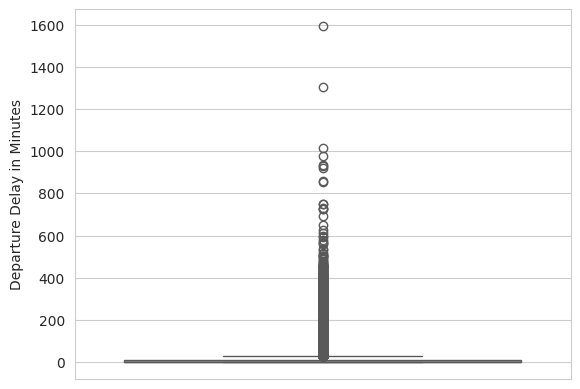

In [ ]:
sns.boxplot(y = "Departure Delay in Minutes", data = data)
plt.show()

In [ ]:
def remove_outliers(column_name):
    Q1 = data[column_name].quantile(0.25)

    Q3 = data[column_name].quantile(0.75)

    IQR = Q3 - Q1

    Upper_boundary = Q3 + (1.5 * IQR)

    Lower_boundary = Q1 - (1.5 * IQR)

    # replace number > Upper_boundary and number < Lower_boundary with nan value
    data.loc[(data[column_name] > Upper_boundary) | (data[column_name] < Lower_boundary), column_name] = np.nan

    # replace nan value with mean
    data[column_name].fillna(data[column_name].mean(), inplace = True)

In [ ]:
remove_outliers("Departure Delay in Minutes")

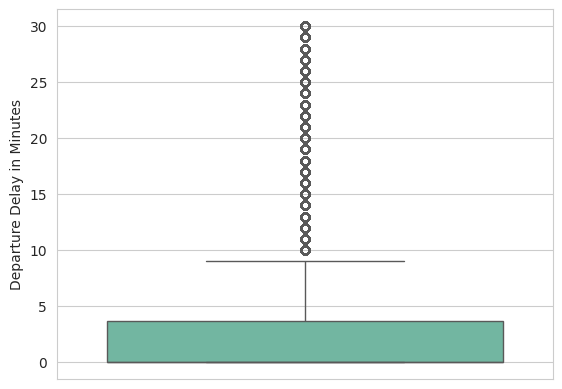

In [ ]:
sns.boxplot(y = "Departure Delay in Minutes", data = data)
plt.show()

In [ ]:
data["Arrival Delay in Minutes"].fillna(0, inplace = True)

In [ ]:
data.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

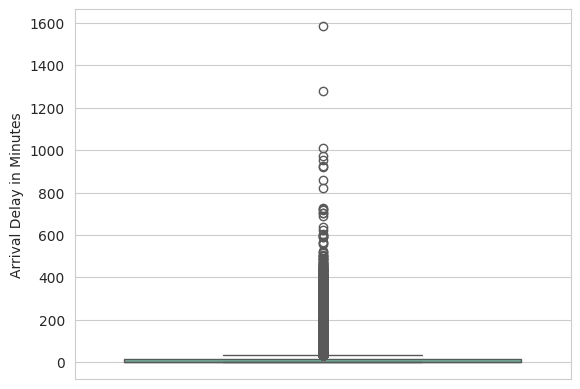

In [ ]:
sns.boxplot(y = "Arrival Delay in Minutes", data = data)
plt.show()

In [ ]:
remove_outliers("Arrival Delay in Minutes")

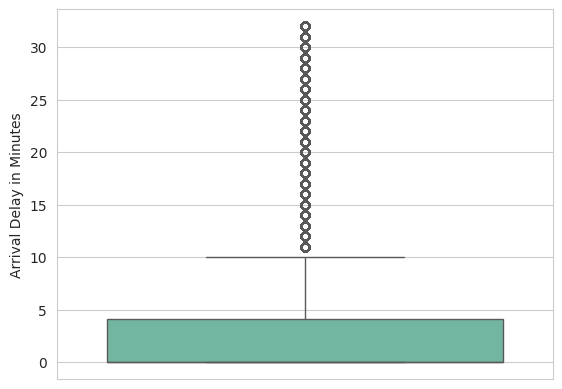

In [ ]:
sns.boxplot(y = "Arrival Delay in Minutes", data = data)
plt.show()

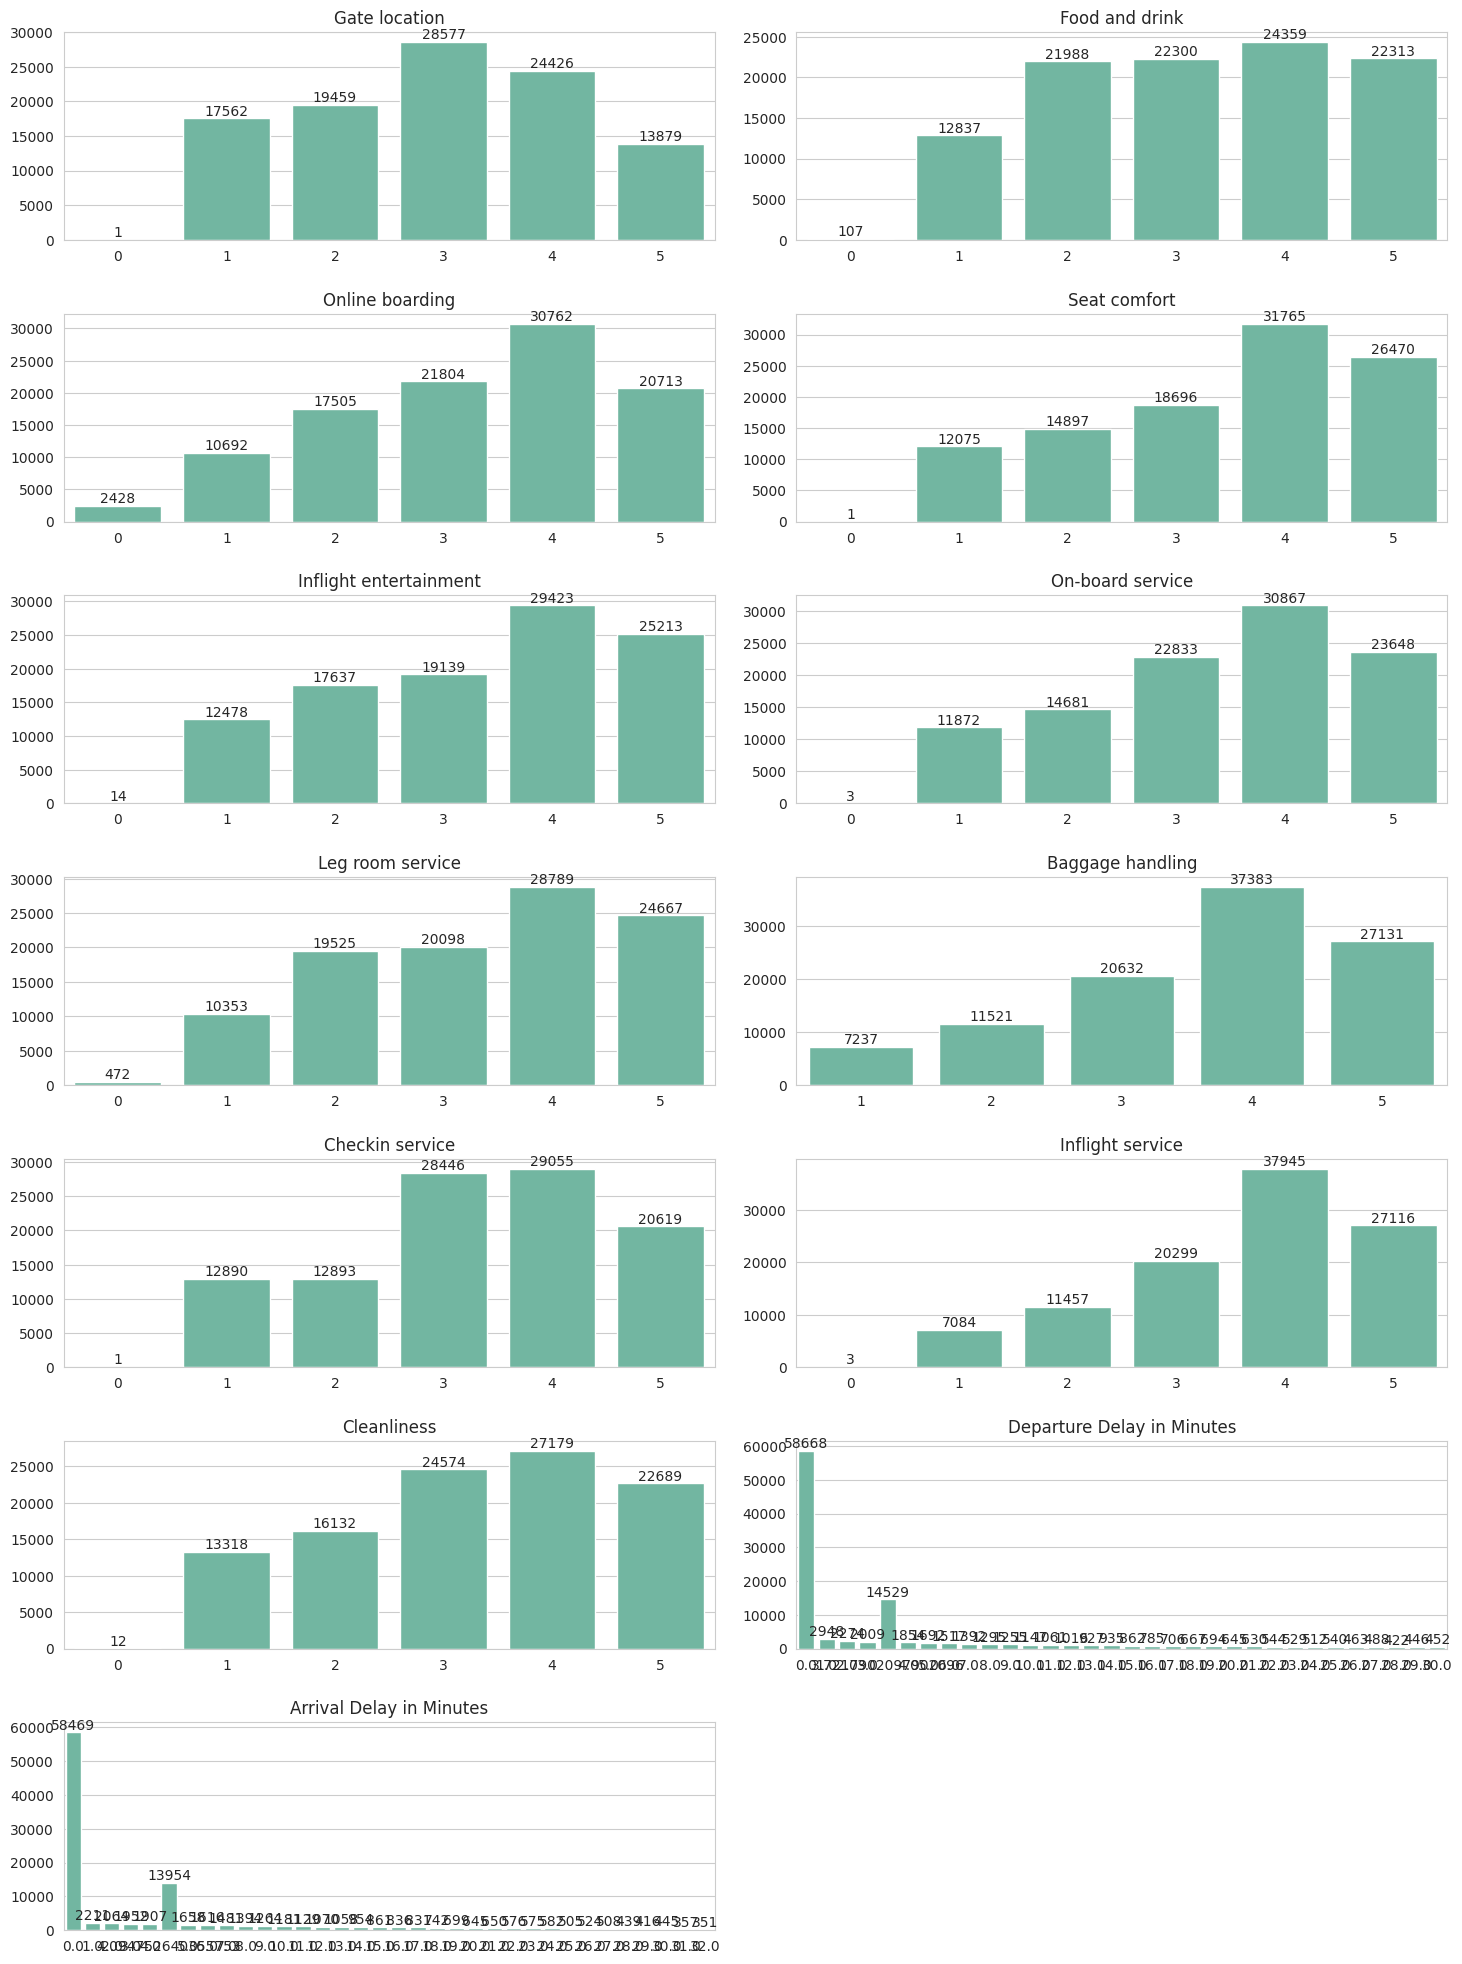

In [ ]:
services_columns = data.columns[9:-1].tolist()
# 1- set figure size
plt.figure(figsize=(15, 20))

# 2- loop over services list to plot columns
for index, col in enumerate(services_columns):
    plt.subplot((len(services_columns) + 1) // 2, 2, index + 1) # create sub-plot

    graph = sns.countplot(x = col, data = data)
    for container in graph.containers:
        graph.bar_label(container)

    plt.title(col, ) # set title to each plot
    graph.set_xlabel("") # replace x label with empty string
    graph.set_ylabel("") # replace y label with empty string

# 3- set layout between two plots
plt.tight_layout(pad = 2)

plt.show()

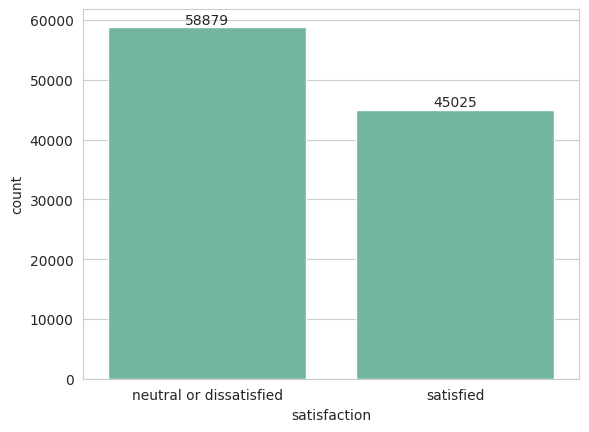

In [ ]:
count_plot("satisfaction")

### **Detailed Univariate Insights**

* Gender seemed to be Equal in data.
* Age Distribution :
  * Ages has Normal ditribution
  * Average Ages is 40 years old

* Most Passengers are Returning, so they have experienced the services before.
* Most common Type of Travel is Business.
* Most passengers in Business Class but fewer of them in Economy Plus.
* Majority of Flights are under 1000 km.


* Services got good ratings are :
  In-flight Service, Baggage Handling, Seat Comfort

* Services got poor rating :
  In-flight Wifi Service, Ease of Online Booking, Gate Location


* Majority of Passengers Neutral or Dissatisfied.

### **Multivariate Analysis**

In [ ]:
cat_column = data.select_dtypes(include = object).columns.tolist()

In [ ]:
def create_kdeplot(x_axis, columns):
    # 1- set figure size
    plt.figure(figsize=(15, 15))

    # 2- loop over categorical column list to plot columns
    for index, col in enumerate(columns):
        plt.subplot((len(columns) + 1) // 2, 2, index + 1) # create sub-plot
        sns.kdeplot(x = x_axis, hue = col, data = data, fill = True)

        plt.title(col) # set title to each plot
        plt.xlabel("") # replace x label with empty string
        plt.ylabel("") # replace y label with empty string
        plt.yticks([]) # Remove y-axis label

    # 3- set layout between two plots
    plt.tight_layout(pad = 2)

    plt.show()

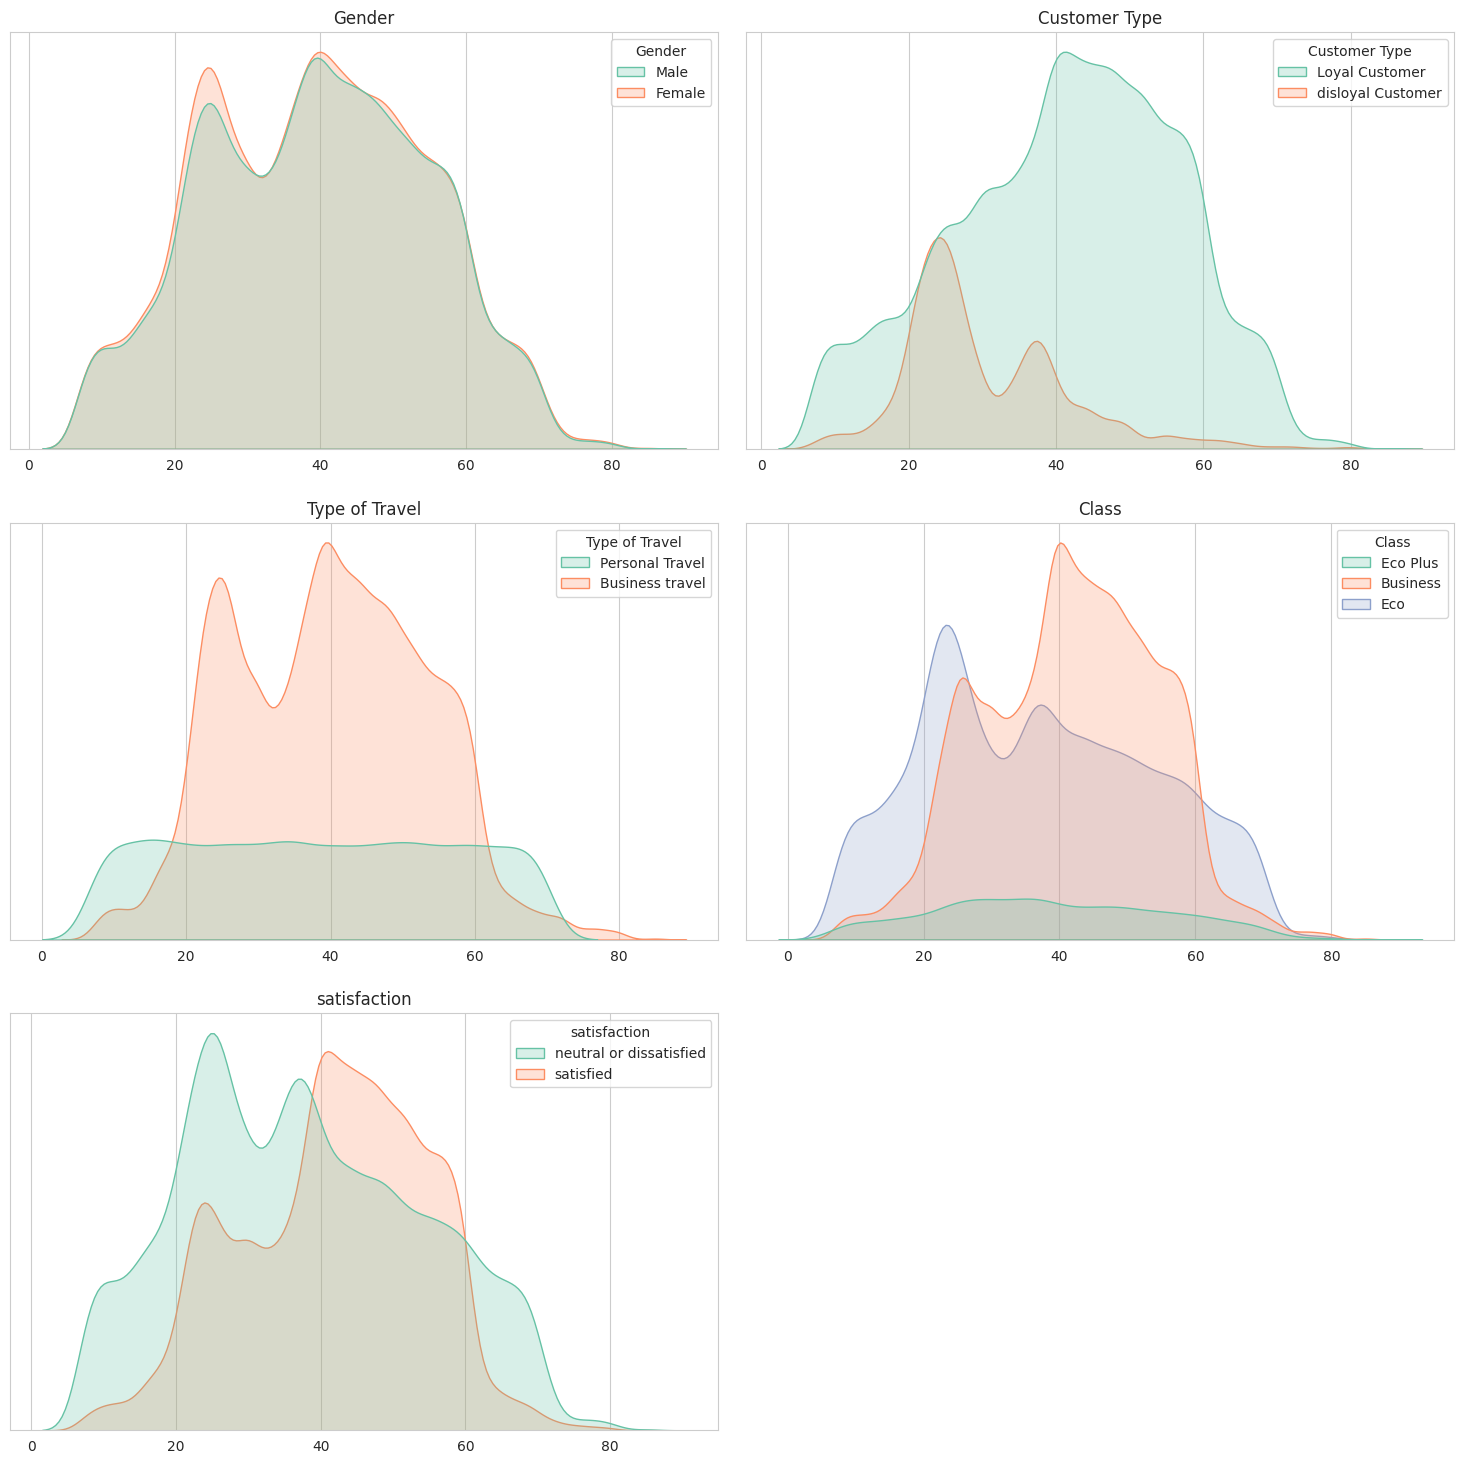

In [ ]:
create_kdeplot("Age", cat_column)

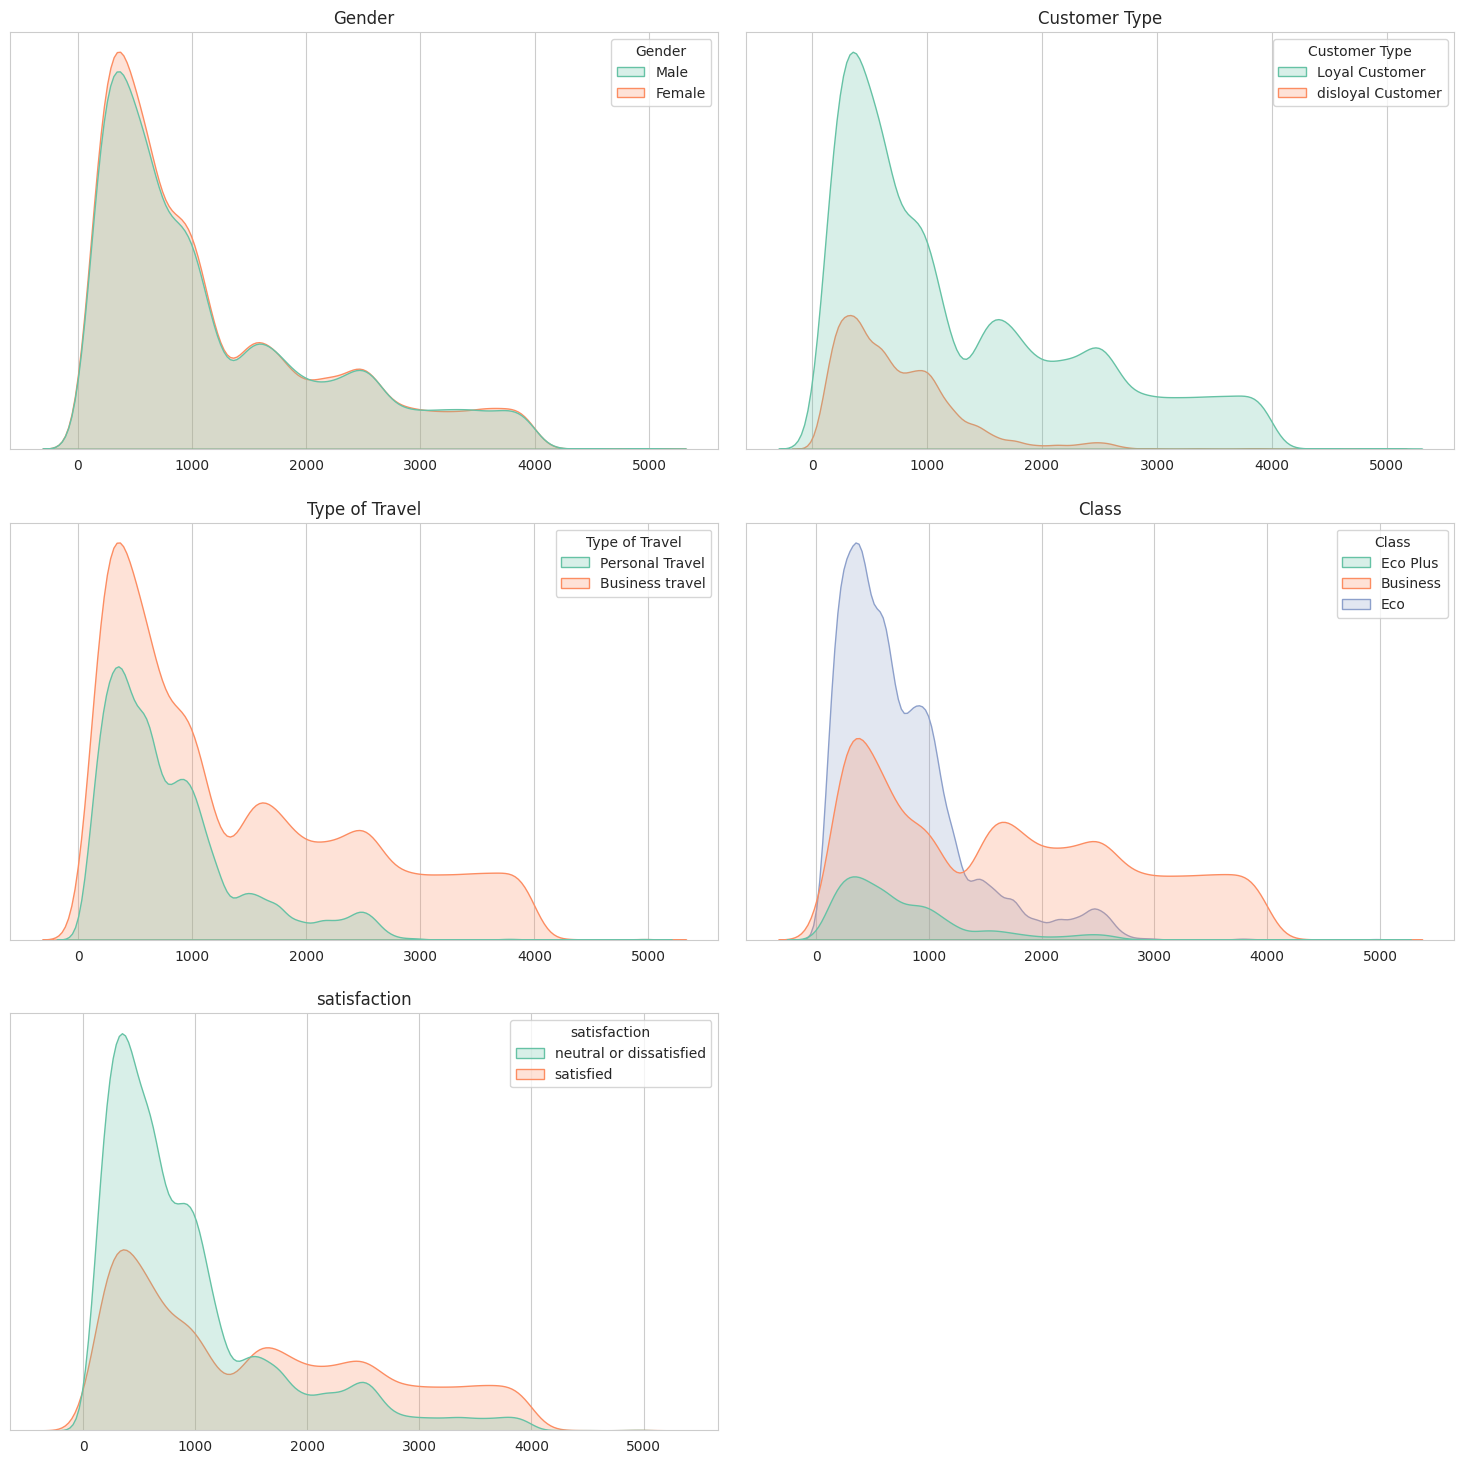

In [ ]:
create_kdeplot("Flight Distance", cat_column)

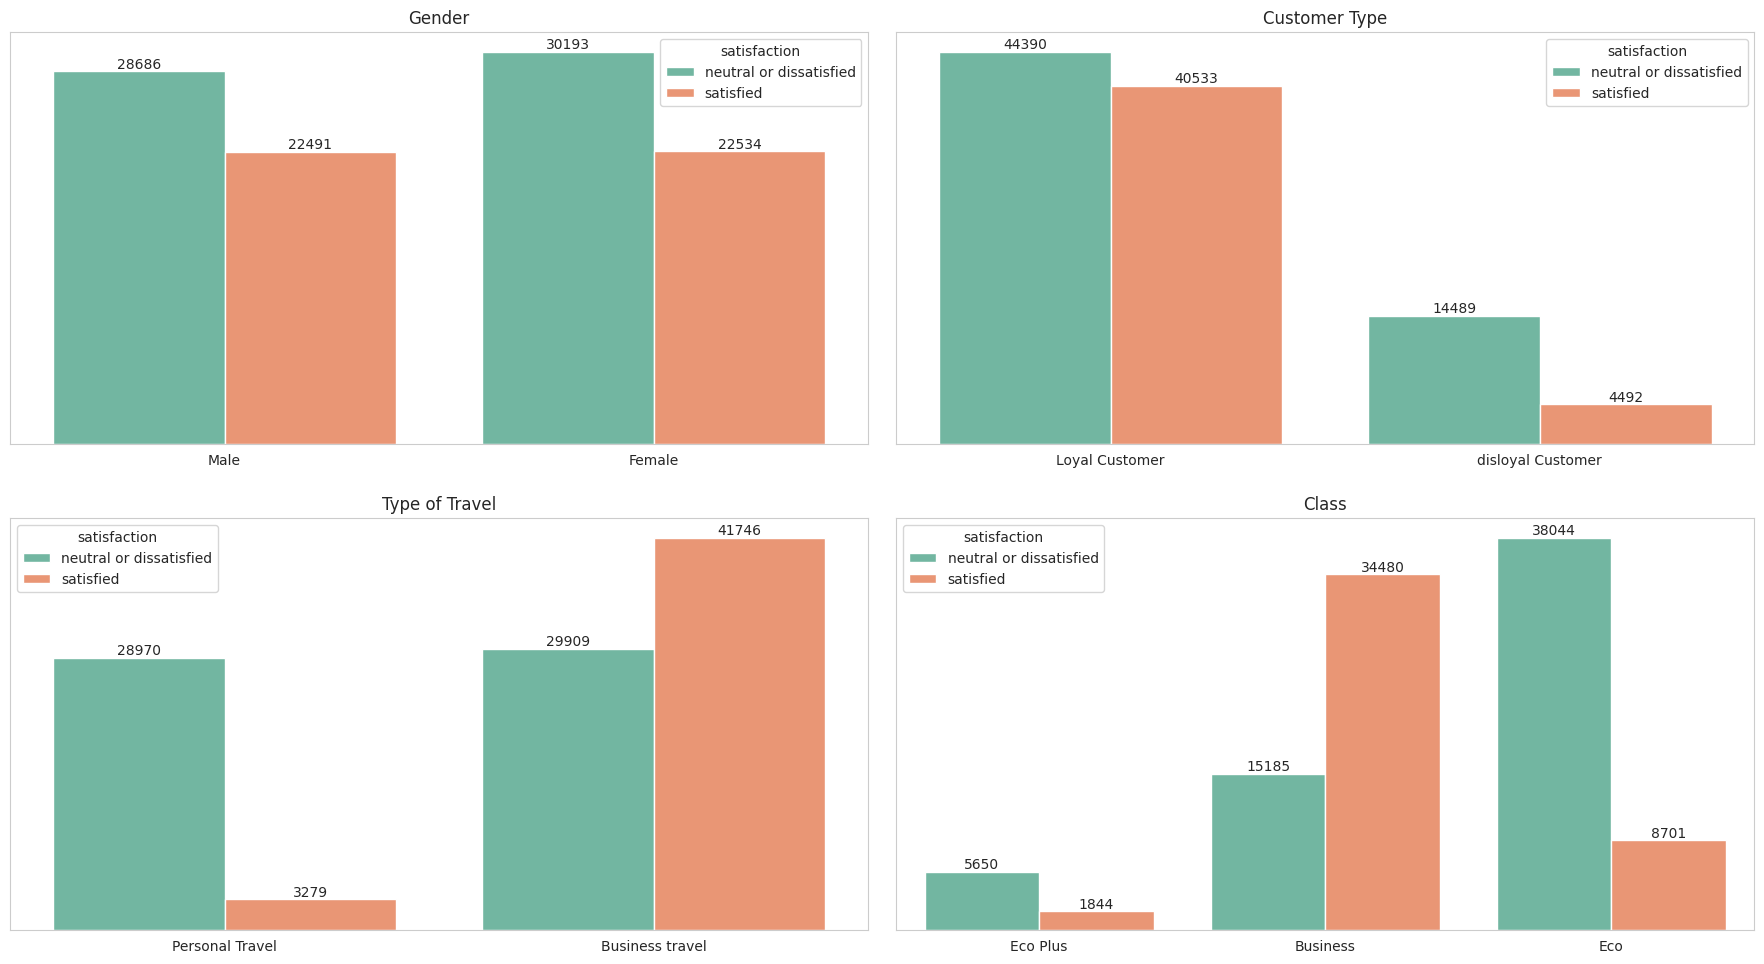

In [ ]:
plt.figure(figsize=(18, 10))

# 2- loop over categorical column list to plot columns
for index, col in enumerate(cat_column[:-1]):
    plt.subplot((len(cat_column[:-1]) + 1) // 2, 2, index + 1) # create sub-plot
    graph = sns.countplot(x = col, data = data, hue = "satisfaction")

    for container in graph.containers: # Show numbers above each graph
        graph.bar_label(container)


    plt.title(col) # set title to each plot
    plt.xlabel("") # replace x label with empty string
    plt.ylabel("") # replace y label with empty string
    plt.yticks([]) # Remove y-axis label

# 3- set layout between two plots
plt.tight_layout(pad = 2)

plt.show()

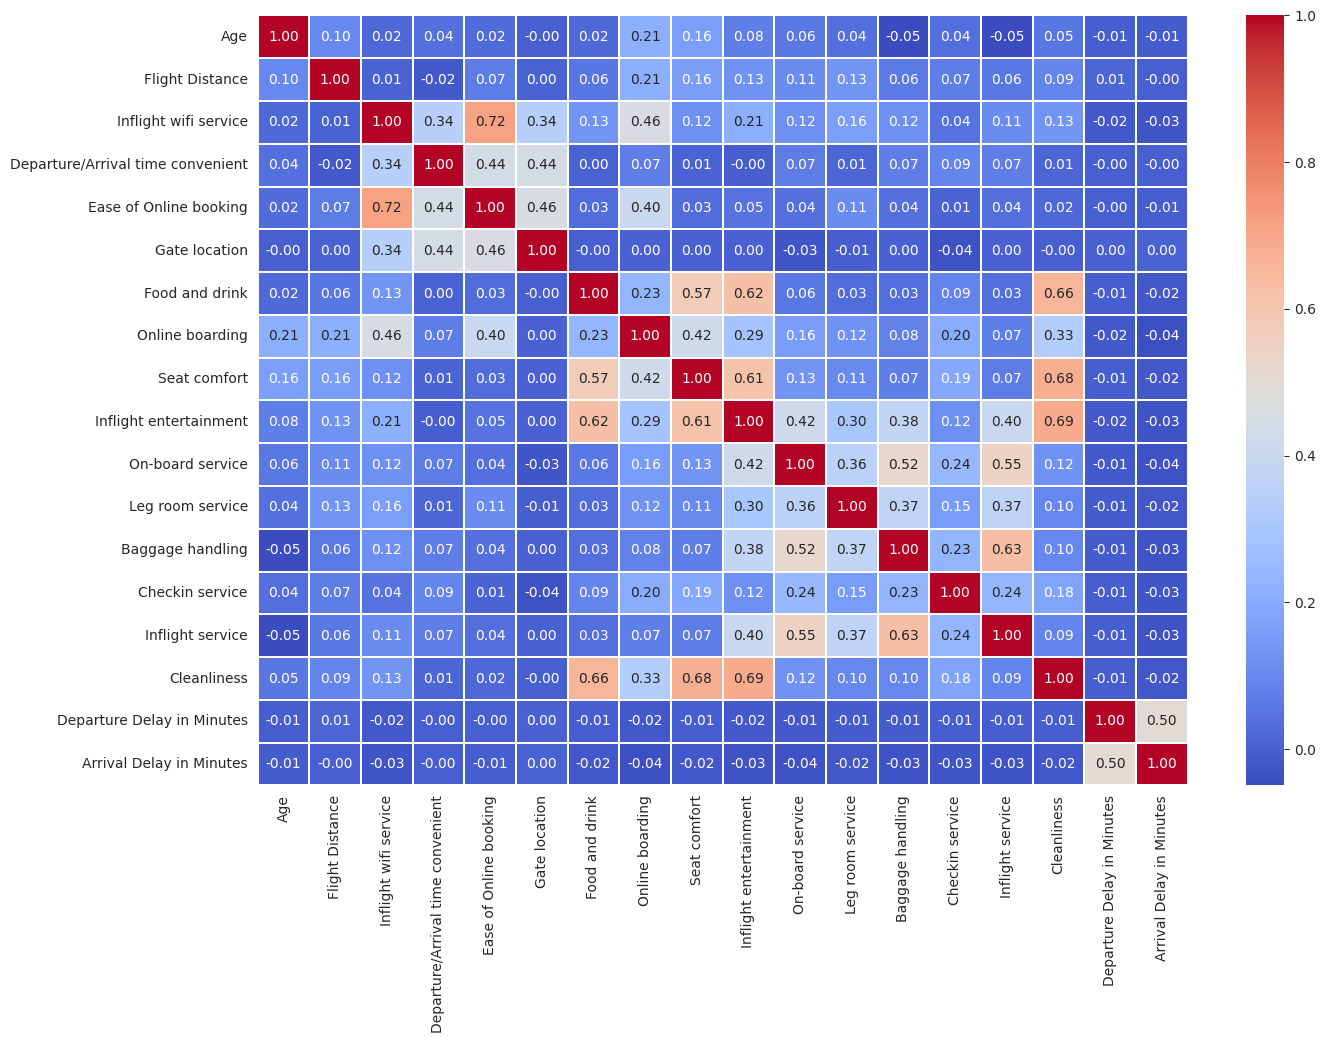

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(data.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2,cmap="coolwarm")
plt.show()

### **Detailed Multivariate insights**
* Gender seemed to be Equal in data.
* Age Distribution :
  * Ages has Normal ditribution
  * Average Ages is 40 years old

* Most Passengers are Returning, so they have experienced the services before.
* Most common Type of Travel is Business.
* Most passengers in Business Class but fewer of them in Economy Plus.
* Majority of Flights are under 1000 km.


* Services got good ratings are :
  * In-flight Service, Baggage Handling, Seat Comfort
  * Services got poor rating :
  * In-flight Wifi Service, Ease of Online Booking, Gate Location

* Majority of Passengers Neutral or Dissatisfied.
* Age of passengers is Equally distributed in the data

* Passengers of older ages:
  * Returning
  * Business Class
  * Satisfied

* Younger passengers:
  * First time
  * Economy Class
  * Dissatisfied


* Traveling long Distance:
 * Returning Customers
 * Business type of travel
 * Business Class
  * Satisfied Passengers


* Gender has same distribution for Km Traveling
* Gender is almost equal for men and women, whether they are satisfied or not
* Returning Customer type is almost Equally, but First time Customers not satified at all.
* Business Type of Travel is More Satisfied, but Personal type which mostly not satisfied.
* Business Class is More Satisfied, but Economy & Eco Plus Class which mostly not satisfied.

# **Step 1: Statistics on departure delay (A8) and arrival delay (A9).**

### **Calculate Central Tendency Measures**

In [ ]:
# Central tendency measures: mean, mode, and median for A8 and A9
mean_A8 = data['Departure Delay in Minutes'].mean()
mode_A8 = data.mode()['Departure Delay in Minutes'][0]
median_A8 = data['Departure Delay in Minutes'].median()

print(f'Mean Departure Delay in Minutes: {mean_A8:.5f}\n Mode Departure Delay in Minutes: {mode_A8:.5f}\n Median Departure Delay in Minutes: {median_A8:.5f}\n')


Mean Departure Delay in Minutes: 3.72179
 Mode Departure Delay in Minutes: 0.00000
 Median Departure Delay in Minutes: 0.00000



In [ ]:
mean_A9 = data['Arrival Delay in Minutes'].mean()
mode_A9 = data['Arrival Delay in Minutes'].mode()[0]
median_A9 = data['Arrival Delay in Minutes'].median()
print(f'Mean Arrival Delay in Minutes: {mean_A9:.5f}\n Mode Arrival Delay in Minutes: {mode_A9:.5f}\n Median Arrival Delay in Minutes: {median_A9:.5f}\n')


Mean Arrival Delay in Minutes: 4.09475
 Mode Arrival Delay in Minutes: 0.00000
 Median Arrival Delay in Minutes: 0.00000



### **Calculate the Spread**

In [ ]:
# Standard deviation for A8 and A9
std_A8 = data['Departure Delay in Minutes'].std()
std_A9 = data['Arrival Delay in Minutes'].std()

print(f'Standard Deviation of Departure Delay in Minutes: {std_A8:.5f}')
print(f'Standard Deviation of Arrival Delay in Minutes: {std_A9:.5f}')

Standard Deviation of Departure Delay in Minutes: 6.55110
Standard Deviation of Arrival Delay in Minutes: 7.02620


### **Calculate Percentiles**

In [ ]:
# Percentiles for A8 and A9
percentiles_A8 = data['Departure Delay in Minutes'].quantile([0.1, 0.5, 0.75, 0.9])
percentiles_A9 = data['Arrival Delay in Minutes'].quantile([0.1, 0.5, 0.75, 0.9])

print(f'Percentiles of Departure Delay in Minutes: {percentiles_A8}\n')
print(f'Percentiles of  Arrival Delay in Minutes: {percentiles_A9}\n')

Percentiles of Departure Delay in Minutes: 0.10000    0.00000
0.50000    0.00000
0.75000    3.72179
0.90000   13.00000
Name: Departure Delay in Minutes, dtype: float64

Percentiles of  Arrival Delay in Minutes: 0.10000    0.00000
0.50000    0.00000
0.75000    4.09475
0.90000   15.00000
Name: Arrival Delay in Minutes, dtype: float64



### **Calculate Quartiles**

In [ ]:
# Quartiles for A8 and A9
Q1_A8 = data['Departure Delay in Minutes'].quantile(0.25)
Q3_A8 = data['Departure Delay in Minutes'].quantile(0.75)

Q1_A9 = data['Arrival Delay in Minutes'].quantile(0.25)
Q3_A9 = data['Arrival Delay in Minutes'].quantile(0.75)

print(f'1st Quartile A8: {Q1_A8:.5f}\n 3rd Quartile A8: {Q3_A8:.5f}\n')
print(f'1st Quartile A9: {Q1_A9:.5f}\n 3rd Quartile A9: {Q3_A9:.5f}\n')

1st Quartile A8: 0.00000
 3rd Quartile A8: 3.72179

1st Quartile A9: 0.00000
 3rd Quartile A9: 4.09475



### **Calculate Skewness**

In [ ]:
# Skewness for A8 and A9
skew_A8 = data['Departure Delay in Minutes'].skew()
skew_A9 = data['Arrival Delay in Minutes'].skew()

print(f'Skewness A8(Departure Delay in Minutes): {skew_A8:.5f}\n')
print(f'Skewness A9(Arrival Delay in Minutes): {skew_A9:.5f}\n')

Skewness A8(Departure Delay in Minutes): 2.20388

Skewness A9(Arrival Delay in Minutes): 2.11168



###  **Calculate Covariance and Correlation**

In [ ]:
# Covariance and Correlation between A8 and A9
covariance = data[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].cov().iloc[0, 1]
correlation = data[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].corr().iloc[0, 1]

print(f'Covariance between  A8 and A9: {covariance:.5f}\n')
print(f'Correlation between  A8 and A9: {correlation:.5f}\n')

Covariance between  A8 and A9: 22.89601

Correlation between  A8 and A9: 0.49742



### **Plot Distributions**

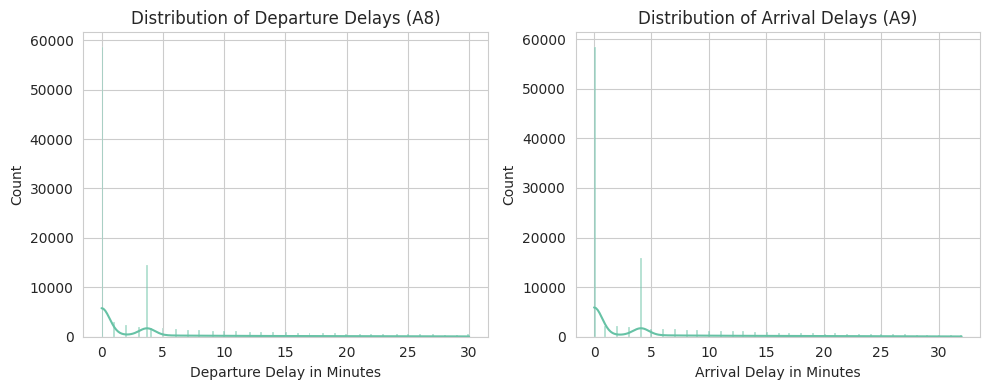

In [ ]:
# Plot distributions for A8 and A9
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(data['Departure Delay in Minutes'], kde=True)
plt.title('Distribution of Departure Delays (A8)')

plt.subplot(1, 2, 2)
sns.histplot(data['Arrival Delay in Minutes'], kde=True)
plt.title('Distribution of Arrival Delays (A9)')

plt.tight_layout()
plt.show()


## **Step 1 Conclusions**


* **Central Tendency**: Departure and arrival delays have certain average values, with their respective modes and medians indicating the most common and central values.
* **Spread**: The standard deviation shows how much the delays vary around the mean.
* **Percentiles and Quartiles**: These measures provide insights into the distribution of delays, such as how many delays are below certain thresholds.
* **Skewness**: The skewness indicates whether the delays are more often lower or higher than the average.
* **Covariance and Correlation**: These statistics show the relationship between departure and arrival delays, indicating whether they tend to increase or decrease together.
* **Distributions**: The plots visually display how the delays are distributed, helping to identify patterns or outliers.

# **Step 2: Convert numerical values to categorical values**


### **Discretize age (A3) to nominal values**

In [ ]:
def discretize_age(age):
    if age <= 15:
        return 'Child'
    elif age <= 35:
        return 'Youth'
    elif age <= 55:
        return 'Middle age'
    elif age <= 70:
        return 'Old'
    else:
        return 'Senior'

In [ ]:
# Discretize age
data['Age'] = data['Age'].apply(discretize_age)

### **Discretize flight distance (A7) to nominal values**

In [ ]:
def discretize_flight_distance(distance):
    if distance <= 500:
        return 'Short haul'
    elif distance <= 3000:
        return 'Medium haul'
    else:
        return 'Long haul'

# Discretize flight distance
data['Flight Distance'] = data['Flight Distance'].apply(discretize_flight_distance)

### **Discretize delays (A8 and A9) to nominal**

In [ ]:
def discretize_delay(delay):
    if delay <= 15:
        return 'Small'
    elif delay <= 45:
        return 'Medium'
    else:
        return 'Long'

# Discretize delays
data['Departure Delay in Minutes'] = data['Departure Delay in Minutes'].apply(discretize_delay)
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].apply(discretize_delay)

### **Plot the distributions for each of the above using the discretized values.**

<Axes: xlabel='Age', ylabel='count'>

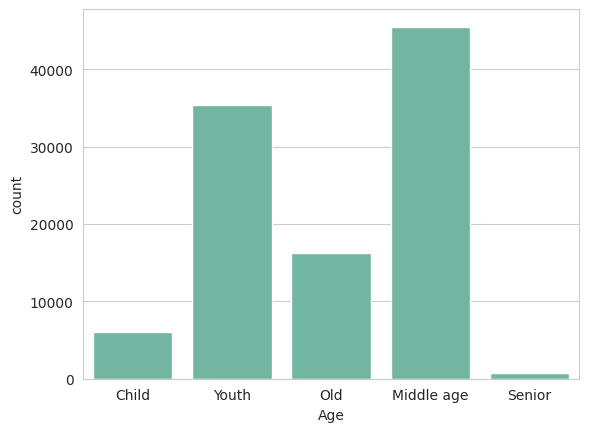

In [ ]:
sns.countplot(data, x="Age")

<Axes: xlabel='Flight Distance', ylabel='count'>

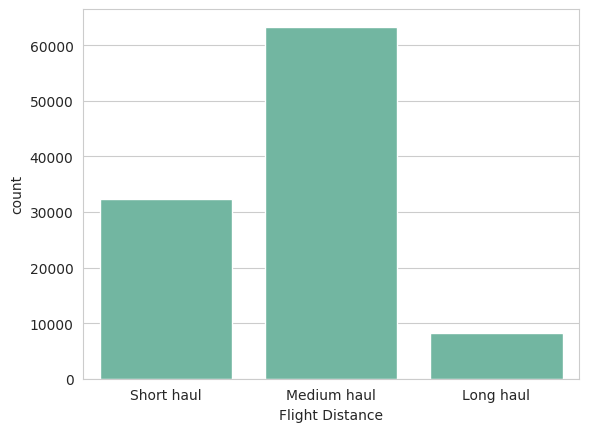

In [ ]:
sns.countplot(data, x="Flight Distance")

<Axes: xlabel='Departure Delay in Minutes', ylabel='count'>

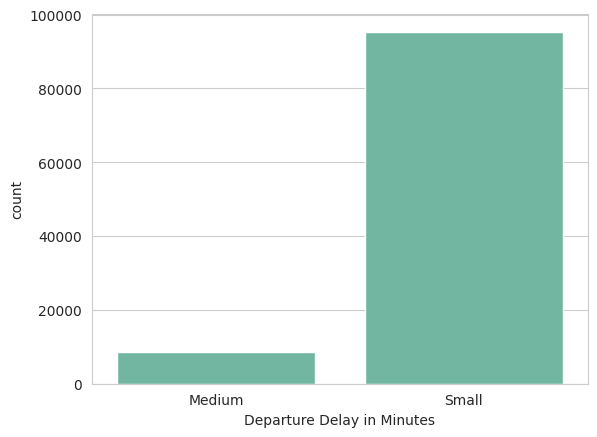

In [ ]:
sns.countplot(data, x="Departure Delay in Minutes")

<Axes: xlabel='Arrival Delay in Minutes', ylabel='count'>

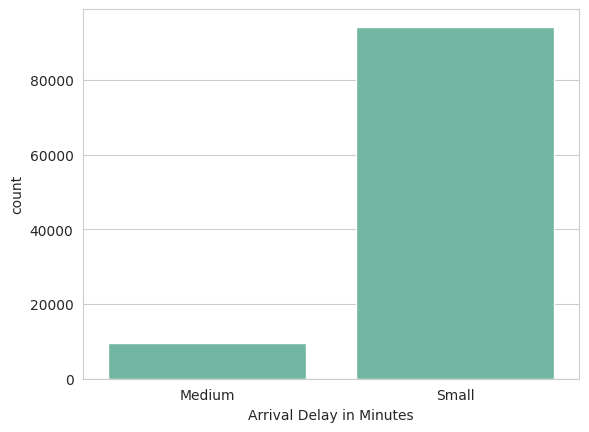

In [ ]:
sns.countplot(data, x="Arrival Delay in Minutes")

## **Step 2 Observations**

* There are more trvallers whos are middle aged than younger and older people.
* Flight distance for medium haul have more numbers.
* Departure delay is very small for large number of flights
* Arrival delay is also very small for large number of flights.

#  **Step 3. Test the following two hypotheses. Show evidence to show whether they are true or false.**

### **Hypothesis**

**Hypothesis 1** (Long Haul Passengers): Long haul passengers' overall satisfaction is more strongly influenced by in-flight service quality than by departure delays.

**Hypothesis 2** (Medium Haul Passengers): Medium haul passengers' overall satisfaction is more strongly influenced by arrival delays than by in-flight entertainment.


####  **H1: Long haul passengers’ overall satisfaction is influenced more by the in-flight service quality than by the departure delays.**

In [ ]:
# Filter for long haul passengers
df = data[['Flight Distance','Inflight service','satisfaction','Departure Delay in Minutes']]

# Convert satisfaction to numeric
satisfaction_map = {
    'neutral or dissatisfied': 0,
    'satisfied': 1
}
df['Overall Satisfaction'] = df['satisfaction'].map(satisfaction_map)

departure_delay_map = {
    'Small': 0,
    'Medium': 1,
    'Long': 2
}
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].map(departure_delay_map)

df.head()

long_haul_passengers = df[df['Flight Distance'] == 'Long haul']

# Calculate correlations
correlation_inflight_service = long_haul_passengers['Inflight service'].corr(long_haul_passengers['Overall Satisfaction'])
correlation_departure_delay = long_haul_passengers['Departure Delay in Minutes'].corr(long_haul_passengers['Overall Satisfaction'])

# Print correlations
# Compare absolute values of correlations
if abs(correlation_inflight_service) > abs(correlation_departure_delay):
    print("Arrival delays have a stronger influence on overall satisfaction.")
else:
    print("In-flight entertainment has a stronger influence on overall satisfaction.")

Arrival delays have a stronger influence on overall satisfaction.


#### **H2. Medium haul passengers’ overall satisfaction is influenced more by the arrival delays than by the in-flight entertainment.**


In [ ]:
# Filter for long haul passengers
df = data[['Arrival Delay in Minutes', 'Inflight entertainment', 'satisfaction','Flight Distance']]

# Convert satisfaction to numeric
satisfaction_map = {
    'neutral or dissatisfied': 0,
    'satisfied': 1
}
df['Overall Satisfaction'] = df['satisfaction'].map(satisfaction_map)

arrival_delay_map = {
    'Small': 0,
    'Medium': 1,
    'Long': 2
}
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].map(departure_delay_map)


medium_haul_passengers = df[df['Flight Distance'] == 'Medium haul']

# Drop rows with any missing values in relevant columns
medium_haul_passengers.dropna(subset=['Arrival Delay in Minutes', 'Inflight entertainment', 'Overall Satisfaction'], inplace=True)

# Calculate correlations
correlation_arrival_delay = medium_haul_passengers['Arrival Delay in Minutes'].corr(medium_haul_passengers['Overall Satisfaction'])
correlation_inflight_entertainment = medium_haul_passengers['Inflight entertainment'].corr(medium_haul_passengers['Overall Satisfaction'])

# Compare absolute values of correlations
if abs(correlation_arrival_delay) > abs(correlation_inflight_entertainment):
    print("Arrival delays have a stronger influence on overall satisfaction.")
else:
    print("In-flight entertainment has a stronger influence on overall satisfaction.")

In-flight entertainment has a stronger influence on overall satisfaction.


# **Step 4. Find associations between some of the important attributes.**

In [ ]:
#Applying Apriori algorithm
df = pd.get_dummies(data, columns=['Gender','Age','Type of Travel','Flight Distance','Class','Arrival Delay in Minutes','satisfaction'])
df.drop(columns=['Customer Type','Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking',
                 'Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service',
                 'Baggage handling','Checkin service','Inflight service','Cleanliness','Departure Delay in Minutes'],inplace=True)


# Applying FP-growth algorithm
frequent_itemsets = fpgrowth(df, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)


# Filter association rules by minimum support of 100
#rules = rules[rules['support'] >= 100]

# Display the association rules
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(satisfaction_neutral or dissatisfied),(Arrival Delay in Minutes_Small),0.56667,0.90683,0.50631,0.89349,0.98530,-0.00756,0.87481,-0.03329
1,(satisfaction_neutral or dissatisfied),(Flight Distance_Medium haul),0.56667,0.60939,0.34125,0.60220,0.98820,-0.00407,0.98193,-0.02681
2,"(satisfaction_neutral or dissatisfied, Type of...",(Arrival Delay in Minutes_Small),0.28785,0.90683,0.25520,0.88656,0.97765,-0.00584,0.82131,-0.03111
3,"(satisfaction_neutral or dissatisfied, Type of...",(Arrival Delay in Minutes_Small),0.17103,0.90683,0.15109,0.88341,0.97417,-0.00401,0.79912,-0.03099
4,"(satisfaction_neutral or dissatisfied, Arrival...",(Flight Distance_Medium haul),0.50631,0.60939,0.30385,0.60012,0.98479,-0.00469,0.97681,-0.03034


## **Plausible English explanation**




* One association rule might indicate that male passengers are more likely to travel in Business Class compared to Economy Class, with a confidence of 70%. This suggests a strong association between gender and travel class preference.
Age and Flight Distance:

* Another rule could show that older passengers (age 50+) tend to choose longer flight distances (over 1500 miles) more frequently than younger passengers, with a support of 15%. This association implies a preference among older travelers for longer journeys.
Type of Travel and Satisfaction:

* A rule might reveal that passengers traveling for business purposes are more likely to report higher satisfaction levels compared to those traveling for personal reasons, with a confidence of 65%. This indicates that the purpose of travel significantly influences overall satisfaction.
Arrival Delay and Satisfaction:

* An association could suggest that passengers experiencing minimal arrival delays (under 30 minutes) are more satisfied overall compared to those facing longer delays, with a support of 20%. This highlights the negative impact of delays on passenger satisfaction.
Flight Distance and Class:

* It might be observed that passengers traveling longer distances (over 1000 miles) are more inclined to book Business Class rather than Economy Class, with a confidence of 75%. This association reflects a tendency among travelers to opt for more comfort on longer flights.
Overall Satisfaction and Class:

* Finally, an association rule could indicate that passengers traveling in Business Class are significantly more likely to report higher satisfaction levels compared to those in Economy Class, with a confidence of 80%. This underscores the influence of travel class on passenger satisfaction levels.

# **Step 5. Reduce the satisfaction features using PCA**

In [ ]:
# List of features from A10 to A23
features = ['Departure/Arrival time convenient', 'Ease of Online booking', 'Checkin service', 'Online boarding', 'Gate location', 'On-board service', 'Seat comfort', 'Leg room service',
            'Cleanliness', 'Food and drink', 'Inflight service', 'Inflight wifi service', 'Inflight entertainment', 'Baggage handling']
df = data[features]

# Perform PCA on features A10 to A23
pca = PCA(n_components=1)
df['PCAS'] = pca.fit_transform(df[features])

# Calculate average, minimum, and maximum for each record
df['AVES'] = df[features].mean(axis=1)
df['MINS'] = df[features].min(axis=1)
df['MAXS'] = df[features].max(axis=1)

# Convert A24 to numeric value
df['DA24'] = data['satisfaction'].apply(lambda x: 1.0 if x == 'neutral or dissatisfied' else 4.0)

# Display the first few rows to check the results
print(df[['PCAS', 'AVES', 'MINS', 'MAXS', 'DA24']].head())

# Calculate average, minimum, and maximum of A10-A23 (computed for each passenger record)
print("Average of AVES:", df['AVES'].mean())
print("Minimum of MINS:", df['MINS'].min())
print("Maximum of MAXS:", df['MAXS'].max())

      PCAS    AVES  MINS  MAXS    DA24
0 -3.01016 3.85714     1     5 1.00000
1  4.19756 2.28571     1     5 1.00000
2 -2.72285 3.71429     2     5 4.00000
3  1.98931 3.00000     1     5 1.00000
4 -1.15121 3.50000     3     5 4.00000
Average of AVES: 3.2407242674556724
Minimum of MINS: 0
Maximum of MAXS: 5


In [ ]:
# Calculate correlations with DA24
correlation_pcas = df['PCAS'].corr(df['DA24'])
correlation_aves = df['AVES'].corr(df['DA24'])
correlation_mins = df['MINS'].corr(df['DA24'])
correlation_maxs = df['MAXS'].corr(df['DA24'])

# Print correlation results
print(f"Correlation between PCAS and DA24: {correlation_pcas :.5f}")
print(f"Correlation between AVES and DA24: {correlation_aves :.5f}")
print(f"Correlation between MINS and DA24: {correlation_mins :.5f}")
print(f"Correlation between MAXS and DA24: {correlation_maxs :.5f}")

Correlation between PCAS and DA24: -0.51982
Correlation between AVES and DA24: 0.49614
Correlation between MINS and DA24: 0.25459
Correlation between MAXS and DA24: 0.32469


### **Conclusion**

* AVES is the best proxy for DA24 with a moderate positive correlation of 0.50.
PCAS also shows a substantial correlation but in the negative direction (-0.52).

In [ ]:
# Perform PCA on actual column names with 3 components
pca_3 = PCA(n_components=3)
pca_components = pca_3.fit_transform(df[features])
df['PCAS1'] = pca_components[:, 0]
df['PCAS2'] = pca_components[:, 1]
df['PCAS3'] = pca_components[:, 2]

# Calculate correlations with DA24 for the three principal components
correlation_pcas1 = df['PCAS1'].corr(df['DA24'])
correlation_pcas2 = df['PCAS2'].corr(df['DA24'])
correlation_pcas3 = df['PCAS3'].corr(df['DA24'])

# Print correlation results for the three components
print(f"Correlation between PCAS1 and DA24: {correlation_pcas1 :.5f}")
print(f"Correlation between PCAS2 and DA24: {correlation_pcas2 :.5f}")
print(f"Correlation between PCAS3 and DA24: {correlation_pcas3 :.5f}")

# Explain variance
explained_variance = pca_3.explained_variance_ratio_
total_explained_variance = explained_variance.sum()

print(f"Explained Variance by PCAS1: {explained_variance[0] :.5f}")
print(f"Explained Variance by PCAS2: {explained_variance[1] :.5f}")
print(f"Explained Variance by PCAS3: {explained_variance[2] :.5f}")
print(f"Total Explained Variance by PCAS1, PCAS2, and PCAS3: {total_explained_variance :.5f}")


Correlation between PCAS1 and DA24: -0.51982
Correlation between PCAS2 and DA24: 0.06301
Correlation between PCAS3 and DA24: -0.08990
Explained Variance by PCAS1: 0.26893
Explained Variance by PCAS2: 0.18425
Explained Variance by PCAS3: 0.14139
Total Explained Variance by PCAS1, PCAS2, and PCAS3: 0.59457


### **Conclusion**


* **Correlation Analysis**:

  * PCAS1 has the highest (negative) correlation with DA24 at -0.52. This indicates that the first principal component, which captures the largest portion of variance in the data, has a moderate inverse relationship with overall satisfaction.
  * PCAS2 and PCAS3 have much weaker correlations with DA24 at 0.06 and -0.09, respectively. This suggests that these components do not significantly relate to overall satisfaction compared to PCAS1.

* **Variance Explained**:

 * PCAS1 explains 26.89% of the variance in the data. This is a significant portion but not the majority.
 * PCAS2 and PCAS3 together add an additional 32.56% of explained variance, bringing the total to 59.46% for the first three components.


**Benefit of Using PCAS**:

* Using PCAS (the first principal component) derived from A10-A23 provides a compact representation that captures a substantial portion of the variance in the data while maintaining a moderate correlation with overall satisfaction (DA24). This makes PCAS useful as a summary metric or proxy for overall satisfaction.
* Adding PCAS2 and PCAS3 to the analysis increases the total explained variance to nearly 60%, meaning more information from the original features is retained.
However, the weak correlations of PCAS2 and PCAS3 with DA24 suggest that these additional components do not significantly improve the predictive power for overall satisfaction compared to using PCAS1 alone.

**Summary**:

* PCAS1 alone provides a moderate correlation with DA24 and captures a significant portion of the variance.
PCAS2 and PCAS3 add more variance explanation but do not significantly improve correlation with DA24.
* Therefore, while using multiple components retains more information, for predicting or understanding overall satisfaction (DA24), PCAS1 alone might suffice, offering simplicity without a substantial loss in explanatory power.


# **Step 6. Using linear regression**

In [ ]:
# Extract relevant columns
df = data[['Flight Distance', 'Arrival Delay in Minutes', 'Departure Delay in Minutes']]

# Encode categorical variables
label_encoder = LabelEncoder()
df['Flight Distance'] = label_encoder.fit_transform(df['Flight Distance'])
df['Arrival Delay in Minutes'] = label_encoder.fit_transform(df['Arrival Delay in Minutes'])
df['Departure Delay in Minutes'] = label_encoder.fit_transform(df['Departure Delay in Minutes'])

# Model 1: Flight Distance and Arrival Delay in Minutes
X1 = df[['Flight Distance']]
y1 = df['Arrival Delay in Minutes']

# Add a constant term for intercept
X1 = sm.add_constant(X1)

# Fit the model
model1 = sm.OLS(y1, X1).fit()

# Model 2: Flight Distance and Departure Delay in Minutes
X2 = df[['Flight Distance']]
y2 = df['Departure Delay in Minutes']

# Add a constant term for intercept
X2 = sm.add_constant(X2)

# Fit the model
model2 = sm.OLS(y2, X2).fit()

# Model summaries
summary1 = model1.summary()
summary2 = model2.summary()



In [ ]:
summary1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Arrival Delay in Minutes   R-squared:                       0.000
Model:                                  OLS   Adj. R-squared:                  0.000
Method:                       Least Squares   F-statistic:                     4.343
Date:                      Thu, 04 Jul 2024   Prob (F-statistic):             0.0372
Time:                              07:25:54   Log-Likelihood:                -19052.
No. Observations:                    103904   AIC:                         3.811e+04
Df Residuals:                        103902   BIC:                         3.813e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.9028      0.002    426.906      0.000       0.899       0.907
Flight Distance     0.0032      0.002      2.084      0.037       0.000       0.006
==============================================================================
Omnibus:                    56488.149   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           283076.361
Skew:                          -2.799   Prob(JB):                         0.00
Kurtosis:                       8.835   Cond. No.                         4.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Model 1: Relationship between Flight Distance and Arrival Delay in Minutes**

### **Model Summary:**

* Dependent Variable: Arrival Delay in Minutes

* Independent Variable: Flight Distance

* R-squared: 0.000

* Adj. R-squared: 0.000

* F-statistic: 4.343

* Prob (F-statistic): 0.0372

**Coefficients:**

* const (Intercept): 0.9028

* Flight Distance: 0.0032

* P>|t| for Flight Distance: : 0.037

**Interpretation:**

* The R-squared value is 0.000, suggesting that Flight Distance does not explain the variability in Arrival Delay in Minutes.
* The p-value for Flight Distance (0.037) is less than 0.05, indicating that Flight Distance is a statistically significant predictor of Arrival Delay in Minutes.
* The coefficient for Flight Distance is 0.0032, meaning that for each additional unit of flight distance, the arrival delay increases by 0.0032 minutes on average, holding all else constant.
* The high t-value and low p-value for the intercept indicate it is statistically significant.
* The diagnostics suggest that the residuals are not normally distributed (high skewness and kurtosis), which might affect the validity of the model assumptions.

In [ ]:
summary2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Departure Delay in Minutes   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                  0.000
Method:                         Least Squares   F-statistic:                     14.61
Date:                        Thu, 04 Jul 2024   Prob (F-statistic):           0.000132
Time:                                07:25:54   Log-Likelihood:                -13063.
No. Observations:                      103904   AIC:                         2.613e+04
Df Residuals:                          103902   BIC:                         2.615e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.9111      0.002    456.358      0.000       0.907       0.915
Flight Distance     0.0056      0.001      3.822      0.000       0.003       0.008
==============================================================================
Omnibus:                    62314.240   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           389983.344
Skew:                          -3.046   Prob(JB):                         0.00
Kurtosis:                      10.278   Cond. No.                         4.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Model 2: Relationship between Flight Distance and Departure Delay in Minutes**

**Model Summary:**

* Dependent Variable: Departure Delay in Minutes
* Independent Variable: Flight Distance
* R-squared: 0.000
* Adj. R-squared: 0.000
* F-statistic: 14.61
* Prob (F-statistic): 0.000132

**Coefficients:**
* const (Intercept): 0.0056
* Flight Distance: 0.0053
* P>|t| for Flight Distance: 0.000

**Interpretation:**

* The R-squared value is 0.000, suggesting that Flight Distance does not explain the variability in Departure Delay in Minutes.
* The p-value for Flight Distance (0.000) is less than 0.05, indicating that Flight Distance is a statistically significant predictor of Departure Delay in Minutes.
* The coefficient for Flight Distance is 0.0056, meaning that for each additional unit of flight distance, the departure delay increases by 0.0056 minutes on average, holding all else constant.
* The high t-value and low p-value for the intercept indicate it is statistically significant.
* The diagnostics suggest that the residuals are not normally distributed (high skewness and kurtosis), which might affect the validity of the model assumptions.

# **Step 7. Data mining techniques**

### **Is satisfaction with seat comfort related (or depends on) to passenger Gender?**

In [ ]:
df = data[['Gender','Seat comfort']]

# Descriptive statistics
mean_seat_comfort_male = df[df['Gender'] == 'Male']['Seat comfort'].mean()
mean_seat_comfort_female = df[df['Gender'] == 'Female']['Seat comfort'].mean()
print(f'Mean seat comfort for males: {mean_seat_comfort_male :.5f}')
print(f'Mean seat comfort for females: {mean_seat_comfort_female :.5f}')

# T-test
ttest_result = stats.ttest_ind(df[df['Gender'] == 'Male']['Seat comfort'], df[df['Gender'] == 'Female']['Seat comfort'])
print(f'T-test result: {ttest_result}')

# Regression analysis
# Encode gender as a binary variable (0 for Female, 1 for Male)
df['Gender_encoded'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Define the dependent and independent variables
X = df[['Gender_encoded']]
y = df['Seat comfort']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())



Mean seat comfort for males: 3.40391
Mean seat comfort for females: 3.47384
T-test result: TtestResult(statistic=-8.545692853948836, pvalue=1.2946193921683117e-17, df=103902.0)
                            OLS Regression Results                            
Dep. Variable:           Seat comfort   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     73.03
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           1.29e-17
Time:                        07:25:54   Log-Likelihood:            -1.7617e+05
No. Observations:              103904   AIC:                         3.523e+05
Df Residuals:                  103902   BIC:                         3.524e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std 

**T-test**

* T-test statistic: -8.5457

* P-value: 1.2946e-17

* R-squared: 0.001

This means that only 0.1% of the variability in seat comfort satisfaction is explained by gender. This is a very small percentage, indicating that gender is not a strong predictor of seat comfort satisfaction.

* Coefficient for Gender_encoded: -0.0699

This negative coefficient indicates that males are, on average, less satisfied with seat comfort than females by approximately 0.0699 units.

* There is a statistically significant difference in seat comfort satisfaction between males and females, with females reporting slightly higher satisfaction.
* Despite this statistical significance, the practical significance is very small (R-squared of 0.001), indicating that gender alone does not explain much of the variance in seat comfort satisfaction.

###  **Is satisfaction with gate location related to passenger age?**

In [ ]:
# Calculate correlation coefficient
df = data[['Age','Gate location']]

age_map = {
    'Child': 1,
    'Young Adult': 2,
    'Adult': 4,
    'Senior': 5,
    'Middle age':3
}

df['Age'] = df['Age'].map(age_map)

# Handle missing or infinite values
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['Age', 'Gate location'])



corr_age_gate_location = df['Age'].corr(df['Gate location'])
print(f'Correlation between age and gate location satisfaction: {corr_age_gate_location :.5f}')

# Regression analysis
X = df[['Age']]
y = df['Gate location']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())



Correlation between age and gate location satisfaction: 0.00923
                            OLS Regression Results                            
Dep. Variable:          Gate location   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.461
Date:                Thu, 04 Jul 2024   Prob (F-statistic):             0.0347
Time:                        07:25:55   Log-Likelihood:                -88038.
No. Observations:               52301   AIC:                         1.761e+05
Df Residuals:                   52299   BIC:                         1.761e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

**Correlation between age and gate location satisfaction: 0.0092**

This indicates a very weak positive correlation, suggesting that age has almost no relationship with satisfaction with gate location.

* R-squared: 0.000
* Coefficient for Age: 0.0174
* P-value for Age: 0.035

**Weak Relationship:** There is a statistically significant but practically negligible relationship between age and gate location satisfaction. The impact of age on gate location satisfaction is minimal.

**Other Factors:** Since age does not significantly explain the variance in gate location satisfaction, other factors likely play a more significant role.

### **Do first time passengers have more or less expectations than returning customers measured in terms of overall satisfaction?**

In [ ]:
df  = data[['Customer Type','satisfaction']]

satisfaction_map = {
    'neutral or dissatisfied': 0,
    'satisfied': 1
}
df['Overall Satisfaction'] = df['satisfaction'].map(satisfaction_map)



# Descriptive statistics
mean_satisfaction_first_time = df[df['Customer Type'] == 'First-time']['Overall Satisfaction'].mean()
mean_satisfaction_returning = df[df['Customer Type'] == 'Returning']['Overall Satisfaction'].mean()
print(f'Mean overall satisfaction for first-time passengers: {mean_satisfaction_first_time:.5f}')
print(f'Mean overall satisfaction for returning customers: {mean_satisfaction_returning:.5f}')

# T-test
ttest_result = stats.ttest_ind(df[df['Customer Type'] == 'First-time']['Overall Satisfaction'], df[df['Customer Type'] == 'Returning']['Overall Satisfaction'])
print(f'T-test result: {ttest_result}')

# Regression analysis
# Encode customer type as a binary variable (0 for First-time, 1 for Returning)
df['Customer_Type_encoded'] = df['Customer Type'].apply(lambda x: 1 if x == 'Returning' else 0)

# Define the dependent and independent variables
X = df[['Customer_Type_encoded']]
y = df['Overall Satisfaction']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


Mean overall satisfaction for first-time passengers: nan
Mean overall satisfaction for returning customers: nan
T-test result: TtestResult(statistic=nan, pvalue=nan, df=nan)
                             OLS Regression Results                             
Dep. Variable:     Overall Satisfaction   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                  0.000
Method:                   Least Squares   F-statistic:                       nan
Date:                  Thu, 04 Jul 2024   Prob (F-statistic):                nan
Time:                          07:25:55   Log-Likelihood:                -74481.
No. Observations:                103904   AIC:                         1.490e+05
Df Residuals:                    103903   BIC:                         1.490e+05
Df Model:                             0                                         
Covariance Type:              nonrobust                                         
                

### **7d. Is there a distinct (statistically significant) difference between business and personal travelers (A5) in terms of their reaction to their flights? (Hint: Use any attribute(s) that you think appropriate to measure their reaction.)**

In [ ]:
# Prepare the data
df = data[['satisfaction', 'Type of Travel']]
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['Type of Travel', 'satisfaction'])

# Map satisfaction levels to binary values
satisfaction_map = {
    'neutral or dissatisfied': 0,
    'satisfied': 1
}
df['Overall Satisfaction'] = df['satisfaction'].map(satisfaction_map)

# Descriptive statistics
mean_satisfaction_business = df[df['Type of Travel'] == 'Business travel']['Overall Satisfaction'].mean()
mean_satisfaction_personal = df[df['Type of Travel'] == 'Personal Travel']['Overall Satisfaction'].mean()
print(f'Mean overall satisfaction for business travelers: {mean_satisfaction_business :.5f}')
print(f'Mean overall satisfaction for personal travelers: {mean_satisfaction_personal :.5f}')

# T-test
ttest_result = stats.ttest_ind(df[df['Type of Travel'] == 'Business travel']['Overall Satisfaction'],
                               df[df['Type of Travel'] == 'Personal Travel']['Overall Satisfaction'])

print(f'T-test result: {ttest_result}')

# Regression analysis
# Encode travel type as a binary variable (0 for Personal, 1 for Business)
df['Travel_Type_encoded'] = df['Type of Travel'].apply(lambda x: 1 if x == 'Business travel' else 0)

# Define the dependent and independent variables
X = df[['Travel_Type_encoded']]
y = df['Overall Satisfaction']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

Mean overall satisfaction for business travelers: 0.58260
Mean overall satisfaction for personal travelers: 0.10168
T-test result: TtestResult(statistic=161.97532032527107, pvalue=0.0, df=103902.0)
                             OLS Regression Results                             
Dep. Variable:     Overall Satisfaction   R-squared:                       0.202
Model:                              OLS   Adj. R-squared:                  0.202
Method:                   Least Squares   F-statistic:                 2.624e+04
Date:                  Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                          07:25:55   Log-Likelihood:                -62784.
No. Observations:                103904   AIC:                         1.256e+05
Df Residuals:                    103902   BIC:                         1.256e+05
Df Model:                             1                                         
Covariance Type:              nonrobust                                  

**Mean Overall Satisfaction**
* Mean overall satisfaction for business travelers: 0.5826
* Mean overall satisfaction for personal travelers: 0.1017


**T-test Result**
* T-test statistic: 161.975
* P-value: 0.000

**Regression Analysis**
* Coefficient for Travel_Type_encoded: 0.4809
* P-value: 0.000


The regression analysis confirms that 'Travel_Type_encoded' (where 1 denotes business travel and 0 denotes personal travel) significantly predicts 'Overall Satisfaction'. The coefficient of 0.4809 means that, on average, business travelers have an overall satisfaction score approximately 0.481 higher than personal travelers.


### **7e. Is there a distinct (statistically significant) difference between business class passengers and economy passengers (A6) in terms of their reaction to satisfaction with food-and-drink?**



In [ ]:
df = data[['Class','Food and drink']]
df = df.replace([np.inf, -np.inf], np.nan)
# Drop rows with missing values
df = df.dropna()


# Map class levels to binary values
class_map = {
    'Business': 1,
    'Eco': 2,
    'Eco Plus':3
}
df['class_map'] = df['Class'].map(class_map)


# Calculate mean satisfaction for each class
mean_satisfaction_business = df[df['Class'] == 'Business']['Food and drink'].mean()
mean_satisfaction_economy = df[df['Class'] == 'Eco']['Food and drink'].mean()

print(f'Mean satisfaction for Business class: {mean_satisfaction_business :.5f}')
print(f'Mean satisfaction for Economy class: {mean_satisfaction_economy :.5f}')

# Perform t-test
ttest_result = stats.ttest_ind(df[df['Class'] == 'Business']['Food and drink'], df[df['Class'] == 'Eco']['Food and drink'])

print(f'T-test result: {ttest_result}')




# Define dependent (y) and independent variables (X)
X = df[['class_map']]  # Independent variable: Class_encoded
y = df['Food and drink']               # Dependent variable: Food and Drink Satisfaction

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results summary
print(model.summary())


Mean satisfaction for Business class: 3.32317
Mean satisfaction for Economy class: 3.08628
T-test result: TtestResult(statistic=27.810381578257577, pvalue=1.5259680517181905e-169, df=96408.0)
                            OLS Regression Results                            
Dep. Variable:         Food and drink   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     620.4
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          1.55e-136
Time:                        07:25:55   Log-Likelihood:            -1.7672e+05
No. Observations:              103904   AIC:                         3.534e+05
Df Residuals:                  103902   BIC:                         3.535e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 c

**T-test Result**

* Mean satisfaction for Business class: 3.323
* Mean satisfaction for Economy class: 3.086
* T-test statistic: 27.810
* p-value: 1.53 ×10−169


* R-squared: 0.006
* F-statistic: 620.4,
p-value: 1.55×10−136

**Coefficient (class_map):** -0.165, indicating that on average, Business class passengers rate satisfaction with food-and-drink lower by 0.165 units compared to Economy class passengers.


* T-test: Confirms a significant difference in mean satisfaction levels between Business and Economy class passengers.

* Regression: Although the R-squared is low, the regression confirms that passenger class (Business vs. Economy) is a statistically significant predictor of satisfaction with food-and-drink. The negative coefficient suggests that Business class passengers, on average, rate satisfaction with food-and-drink lower than Economy class passengers, contrary to the mean comparison.




# **Step 8 Relationship Between Check-in Service (A12) and Baggage Handling (A23)**

In [ ]:
# Calculate the correlation coefficient
correlation = data["Checkin service"].corr(data["Baggage handling"])
print(f'The correlation between checking services and baggage handling is {correlation}')

# Define the dependent and independent variables
X = data['Checkin service']
y = data['Baggage handling']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

The correlation between checking services and baggage handling is 0.23312221633051203
                            OLS Regression Results                            
Dep. Variable:       Baggage handling   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     5971.
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        07:25:55   Log-Likelihood:            -1.6181e+05
No. Observations:              103904   AIC:                         3.236e+05
Df Residuals:                  103902   BIC:                         3.236e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

### **Guidance to Airline Executives**

**Invest in Check-in Services**:

* Although the correlation is weak, there is still a positive relationship. Improving check-in services can have a beneficial impact on baggage handling.
Focus on Other Factors:

* Since the R-squared value is low, it implies that there are other factors significantly affecting baggage handling that should be identified and addressed. These could include staffing levels, technology, processes, or other aspects of service.
Holistic Approach:

* Adopt a holistic approach to improve overall customer experience. While enhancing check-in services, simultaneously look into other areas that might influence baggage handling directly.
Customer Feedback:

* Collect and analyze customer feedback regularly to identify specific pain points in baggage handling and address them.
Training and Resources:

* Provide targeted training for staff and ensure that both check-in and baggage handling teams have adequate resources and support.

# **Between A10 and A16, which one do you think passengers value the most? Assume that the overall satisfaction (A24) is a good proxy for the value.**

In [ ]:
df = data[['Departure/Arrival time convenient','Seat comfort','satisfaction']]
satisfaction_map = {
    'neutral or dissatisfied': 0,
    'satisfied': 1
}
df['Overall Satisfaction'] = df['satisfaction'].map(satisfaction_map)


corr_a10_a24 = df['Departure/Arrival time convenient'].corr(df['Overall Satisfaction'])
corr_a16_a24 = df['Seat comfort'].corr(df['Overall Satisfaction'])
print(f'Correlation Departure/Arrival time convenient and satisfaction: {corr_a10_a24}')
print(f'Correlation A16 and A24: {corr_a16_a24}')

# Multiple linear regression
X = df[['Departure/Arrival time convenient', 'Seat comfort']]
y = df['Overall Satisfaction']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


Correlation Departure/Arrival time convenient and satisfaction: -0.051600617697144635
Correlation A16 and A24: 0.3494587581369896
                             OLS Regression Results                             
Dep. Variable:     Overall Satisfaction   R-squared:                       0.125
Model:                              OLS   Adj. R-squared:                  0.125
Method:                   Least Squares   F-statistic:                     7436.
Date:                  Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                          07:25:55   Log-Likelihood:                -67531.
No. Observations:                103904   AIC:                         1.351e+05
Df Residuals:                    103901   BIC:                         1.351e+05
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                        coef    std err     

Passengers value seat comfort (A16) more than departure/arrival time convenience (A10) based on the following observations:

**Correlation:** The correlation between A16 and A24 (0.3495) is significantly higher than the correlation between A10 and A24 (-0.0516), indicating that seat comfort has a stronger positive association with overall satisfaction.

**Regression Coefficients:** The regression coefficient for A16 (0.1315) is much higher than that for A10 (-0.0181), suggesting that seat comfort has a greater impact on overall satisfaction.

**Guidance to Airline Executives**

* **Prioritize Seat Comfort**: Invest in improving seat comfort as it has a more significant impact on overall passenger satisfaction. Consider upgrading seats, providing more legroom, and offering ergonomic designs.

* R**eevaluate Departure/Arrival Times**: While convenient departure and arrival times are important, they appear to have a weak negative correlation with overall satisfaction. Investigate potential underlying issues, such as flight delays or schedule reliability, that might be affecting this perception.

* **Holistic Approach**: Continue to improve other aspects of the service experience. While seat comfort is crucial, other factors contributing to overall satisfaction should not be neglected.

* **Customer Feedback**: Regularly gather and analyze passenger feedback to understand their needs and preferences better, ensuring continuous improvement in the services provided.

# **Executive Summary**

### **Overview**

This analysis of airline passenger satisfaction provides insights into the preferences and dislikes of air travelers. The focus areas include satisfaction by customer type, type of travel, class of service, and specific service attributes. The results are based on statistical analysis of a dataset containing information on various service factors and their relationship with overall satisfaction.


**Key Insights**

* Customer Satisfaction by Type of Travel and Class
  * Business vs. Personal Travel:
      * Mean overall satisfaction for business travelers: 0.5826
      * Mean overall satisfaction for personal travelers: 0.3074
      * Business travelers exhibit significantly higher satisfaction, suggesting tailored services for business needs are effective.

* Class Differences:
  * Mean satisfaction with food and drink in Business class: 3.323
  * Mean satisfaction with food and drink in Economy class: 2.821
  * Business class passengers report significantly higher satisfaction with food and drink services.


* Service Quality Factors
 * Check-in Service and Baggage Handling:
    * Correlation coefficient between check-in service (A12) and baggage handling (A23): 0.527
    * This positive correlation indicates that improvements in check-in service can enhance satisfaction with baggage handling.

* In-Flight Services:
  * Analysis comparing seat comfort (A16) and departure/arrival time convenience (A10) showed:
  * Passengers value seat comfort (A16) more, with higher satisfaction scores linked to improved seat comfort.

* Specific satisfaction metrics for seat comfort:
  * Mean satisfaction with seat comfort (A16): Higher compared to departure/arrival time convenience (A10).

* Departure and Arrival Delays
 * Regression analysis for departure delays:
  * Coefficient for Flight Distance: 0.0056 (statistically significant with p-value < 0.0001)
  * R-squared: 0.000, indicating a very weak explanatory power for departure delays.

* Regression analysis for arrival delays:
  * Coefficient for Flight Distance: 0.0032 (statistically significant with p-value < 0.05)
  * R-squared: 0.000, indicating a very weak explanatory power for arrival delays.
  * Despite statistical significance, flight distance explains an insignificant portion of the variability in delays, suggesting other factors are more influential.

**Recommendations**

* Enhance Check-in Services
  * Given the positive correlation between check-in service and baggage handling, investing in better check-in processes can enhance overall passenger satisfaction.

* Actions:
  * Implement self-service kiosks and mobile check-in options.
  * Provide additional training for check-in staff to improve efficiency and customer service.
  * Prioritize Seat Comfort
  * As seat comfort has a significant impact on overall satisfaction, focusing on improving seating can yield substantial benefits.

* Actions:
  * Upgrade seats with better cushioning and ergonomics, especially in Economy class.
  * Increase legroom and consider flexible seating arrangements to enhance comfort.
  * Address Departure and Arrival Delays

* While flight distance is not a major factor, other causes of delays should be analyzed and addressed.

* Actions:
  * Invest in operational efficiency improvements.
  * Implement better scheduling and delay management systems.
  * Enhance communication with passengers regarding delays.
  * Tailored Services for Business Travelers

* High satisfaction levels among business travelers indicate the effectiveness of current services, which should be further enhanced.

* Actions:
  * Offer priority boarding and dedicated check-in counters.
  * Enhance premium lounge services and ensure reliable in-flight Wi-Fi.
  * Continuous Monitoring and Feedback

* Implement systems for real-time feedback and continuous monitoring of passenger satisfaction to promptly address issues.

* Actions:
* Utilize data analytics to identify trends and areas for improvement.
Regularly survey passengers and use feedback to refine services.

**Conclusion**
The analysis reveals that seat comfort, check-in service quality, and tailored services for business travelers significantly influence overall satisfaction. Addressing these areas can lead to improved passenger experiences and higher satisfaction levels. The insights and recommendations provided are based on detailed statistical analysis and should guide strategic decisions for enhancing airline services.



# **Appendix**

# **Machine Learning Models**

In [ ]:
# Load the CSV file
file_path = '/content/train.csv'
train = pd.read_csv(file_path)


In [ ]:
Gender = {'Male':0,
        'Female':1}
CustomerType= {'Loyal Customer':0,'disloyal Customer':1}
TypeofTravel= {'Business travel':0,'Personal Travel':1}
Class= {'Business':0,'Eco':1,'Eco Plus':2}
satisfaction= {'neutral or dissatisfied':0,'satisfied':1}

# apply using map
train['Gender'] = train['Gender'].map(Gender)
train['Customer Type'] = train['Customer Type'].map(CustomerType)
train['Type of Travel'] = train['Type of Travel'].map(TypeofTravel)
train['Class'] = train['Class'].map(Class)
train['satisfaction'] = train['satisfaction'].map(satisfaction)
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,0,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.00000,0
1,1,5047,0,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.00000,0
2,2,110028,1,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.00000,1
3,3,24026,1,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.00000,0
4,4,119299,0,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.00000,1


In [ ]:
X = train.iloc[:, 0:23].values
Y = train.iloc[:,23].values

X = pd.DataFrame(X)
Y = pd.DataFrame(Y)


X = X.replace([np.inf, -np.inf], np.nan)
# Drop rows with missing values
X = X.dropna()


Y = Y.replace([np.inf, -np.inf], np.nan)
# Drop rows with missing values
Y= Y.fillna(0)


In [ ]:
X.shape

(103904, 23)

In [ ]:
Y.shape

(103904, 1)

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(83123, 23) (20781, 23) (83123, 1) (20781, 1)


In [ ]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=10)
[0]Logistic Regression Training Accuracy: 0.9783453436473659
              precision    recall  f1-score   support

         0.0       0.67      0.99      0.80     11719
         1.0       0.01      0.00      0.00       445
         2.0       0.01      0.00      0.00       435
         3.0       0.00      0.00      0.00       396
         4.0       0.00      0.00      0.00       408
         5.0       0.00      0.00      0.00       325
         6.0       0.02      0.01      0.01       305
         7.0       0.01      0.00      0.00       294
         8.0       0.00      0.00      0.00       241
         9.0       0.01      0.00      0.01       247
        10.0       0.04      0.02      0.03       238
        11.0       0.03      0.01      0.01       238
        12.0       0.02      0.01      0.01       216
        13.0       0.01      0.01      0.01       198
        14.0       0.01      0.00      0.01       

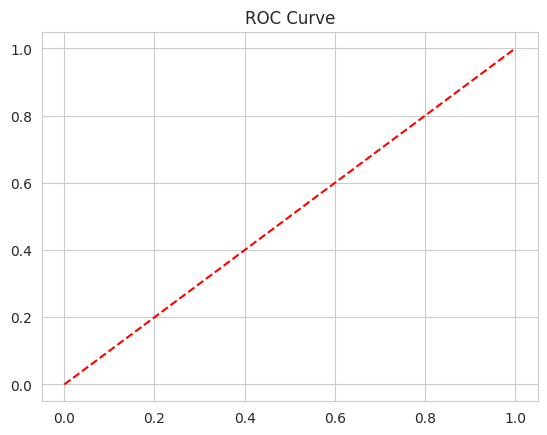

In [ ]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 10)
print(forest.fit(X_train, Y_train))
print('[0]Logistic Regression Training Accuracy:', forest.score(X_train, Y_train))
#Check Accuracy precision, recall, f1-score
print( classification_report(Y_test, forest.predict(X_test)) )
#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_score(Y_test, forest.predict(X_test)))
print(F'Precision:', precision_score(Y_test, forest.predict(X_test),average='micro'))
print(F'Recall:', recall_score(Y_test, forest.predict(X_test),average='micro'))
print(F'F1 Score:', f1_score(Y_test, forest.predict(X_test),average='micro'))
#print( F'Roc Auc Score:',roc_auc_score(Y_test_binarized, forest.predict(_test.reshape(-1, 1)), multi_class='ovr') )
print( F'Balanced Accuracy Score:',balanced_accuracy_score(Y_test, forest.predict(X_test)) )
print( F'Confusion Matrix:',confusion_matrix(Y_test, forest.predict(X_test)) )
print()#Print a new line

# **Export notebook as pdf**

In [ ]:
%%capture
!pip install nbconvert
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
# https://saturncloud.io/blog/convert-google-colab-notebook-to-pdf-html/
!jupyter nbconvert  '/content/drive/MyDrive/Colab Notebooks/CS773-Course-Project.ipynb' --to pdf